<div>
<img src='https://upload.wikimedia.org/wikipedia/commons/6/64/Sharif_University_Logo.jpg' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 6: Practical - Beyond Linearity <br> <br>
<font color=686880 size=4>
    TAs: Amirhossein Ramazani - Arman Malekzadeh - Arshia Soltani Moakhar
    
____

### Full Name : Mohammad Abolnejadian
### Student Number : 98103867
### Colab Link: https://colab.research.google.com/drive/1j9PwSFaO2jVE0vMQBPy-45M-jokW61Ui?usp=sharing
___

# Intro

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- CRIM - per capita crime rate by town<br>
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.<br>
- INDUS - proportion of non-retail business acres per town.<br>
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)<br>
- NOX - nitric oxides concentration (parts per 10 million)<br>
- RM - average number of rooms per dwelling<br>
- AGE - proportion of owner-occupied units built prior to 1940<br>
- DIS - weighted distances to five Boston employment centres<br>
- RAD - index of accessibility to radial highways<br>
- TAX - full-value property-tax rate per `$`10,000<br>
- PTRATIO - pupil-teacher ratio by town<br>
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town<br>
- LSTAT - % lower status of the population<br>
- MEDV - Median value of owner-occupied homes in $1000's<br>

# Libraries

In [56]:
# You can use thes following packages

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

import itertools

# Sec 1: Data Exploration and Preprocessing (30)

Download the dataset

In [57]:
!wget https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv

--2023-05-24 08:22:29--  https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35735 (35K) [text/plain]
Saving to: ‘BostonHousing.csv.1’

BostonHousing.csv.1 100%[===================>]  34.90K  --.-KB/s    in 0.003s  

2023-05-24 08:22:29 (11.1 MB/s) - ‘BostonHousing.csv.1’ saved [35735/35735]



Load the dataset as a dataframe **(S1-1: 2 points)**

In [58]:
df = pd.read_csv("BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


For each of the features, check the number of unique values **(S1-2: 2 points)**

In [59]:
unique_counts = df.nunique()
unique_counts

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
medv       229
dtype: int64

Check if there are any null values in the dataframe (and remove them if they exist) **(S1-3: 2 points)**

In [60]:
null_counts = df.isnull().sum()
print("Number of null values in the dataframe: \n" + str(null_counts))
df = df.dropna()

Number of null values in the dataframe: 
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


We want to predict prices. Therefore, we'll have `medv` as our target. Make a list of the features other than the target. **(S1-4: 2 points)**

In [61]:
X_df = df.drop('medv', axis=1)
Y_df = df['medv']
X = df.drop('medv', axis=1).to_numpy()
Y = df['medv'].to_numpy().reshape(-1, 1)
X.shape, Y.shape

((506, 13), (506, 1))

Plot a boxplot for each of the features **(S1-5: 2 points)**

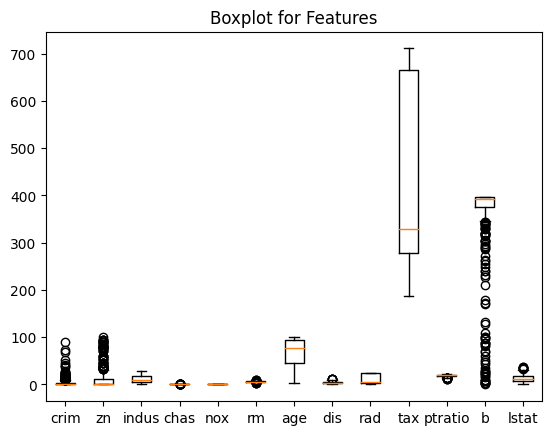

In [62]:
fig, ax = plt.subplots()
ax.boxplot(X)
ax.set_xticklabels(X_df.columns)
ax.set_title('Boxplot for Features')
plt.show()

Plot the historgram of the target **(S1-6: 5 points)**

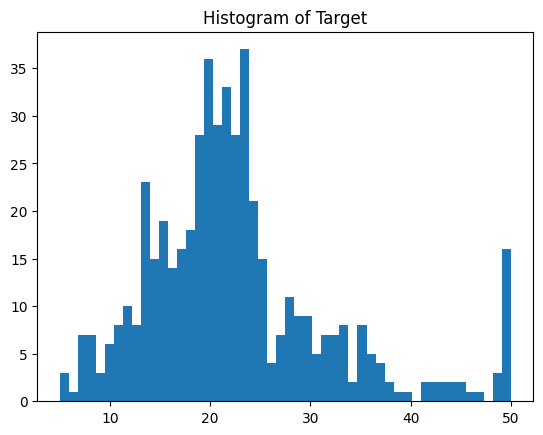

In [63]:
fig, ax = plt.subplots()
ax.hist(Y, bins=50)
ax.set_title('Histogram of Target')
plt.show()

Have a look at the pair-plot of the dataframe's columns **(S1-7: 5 points)**

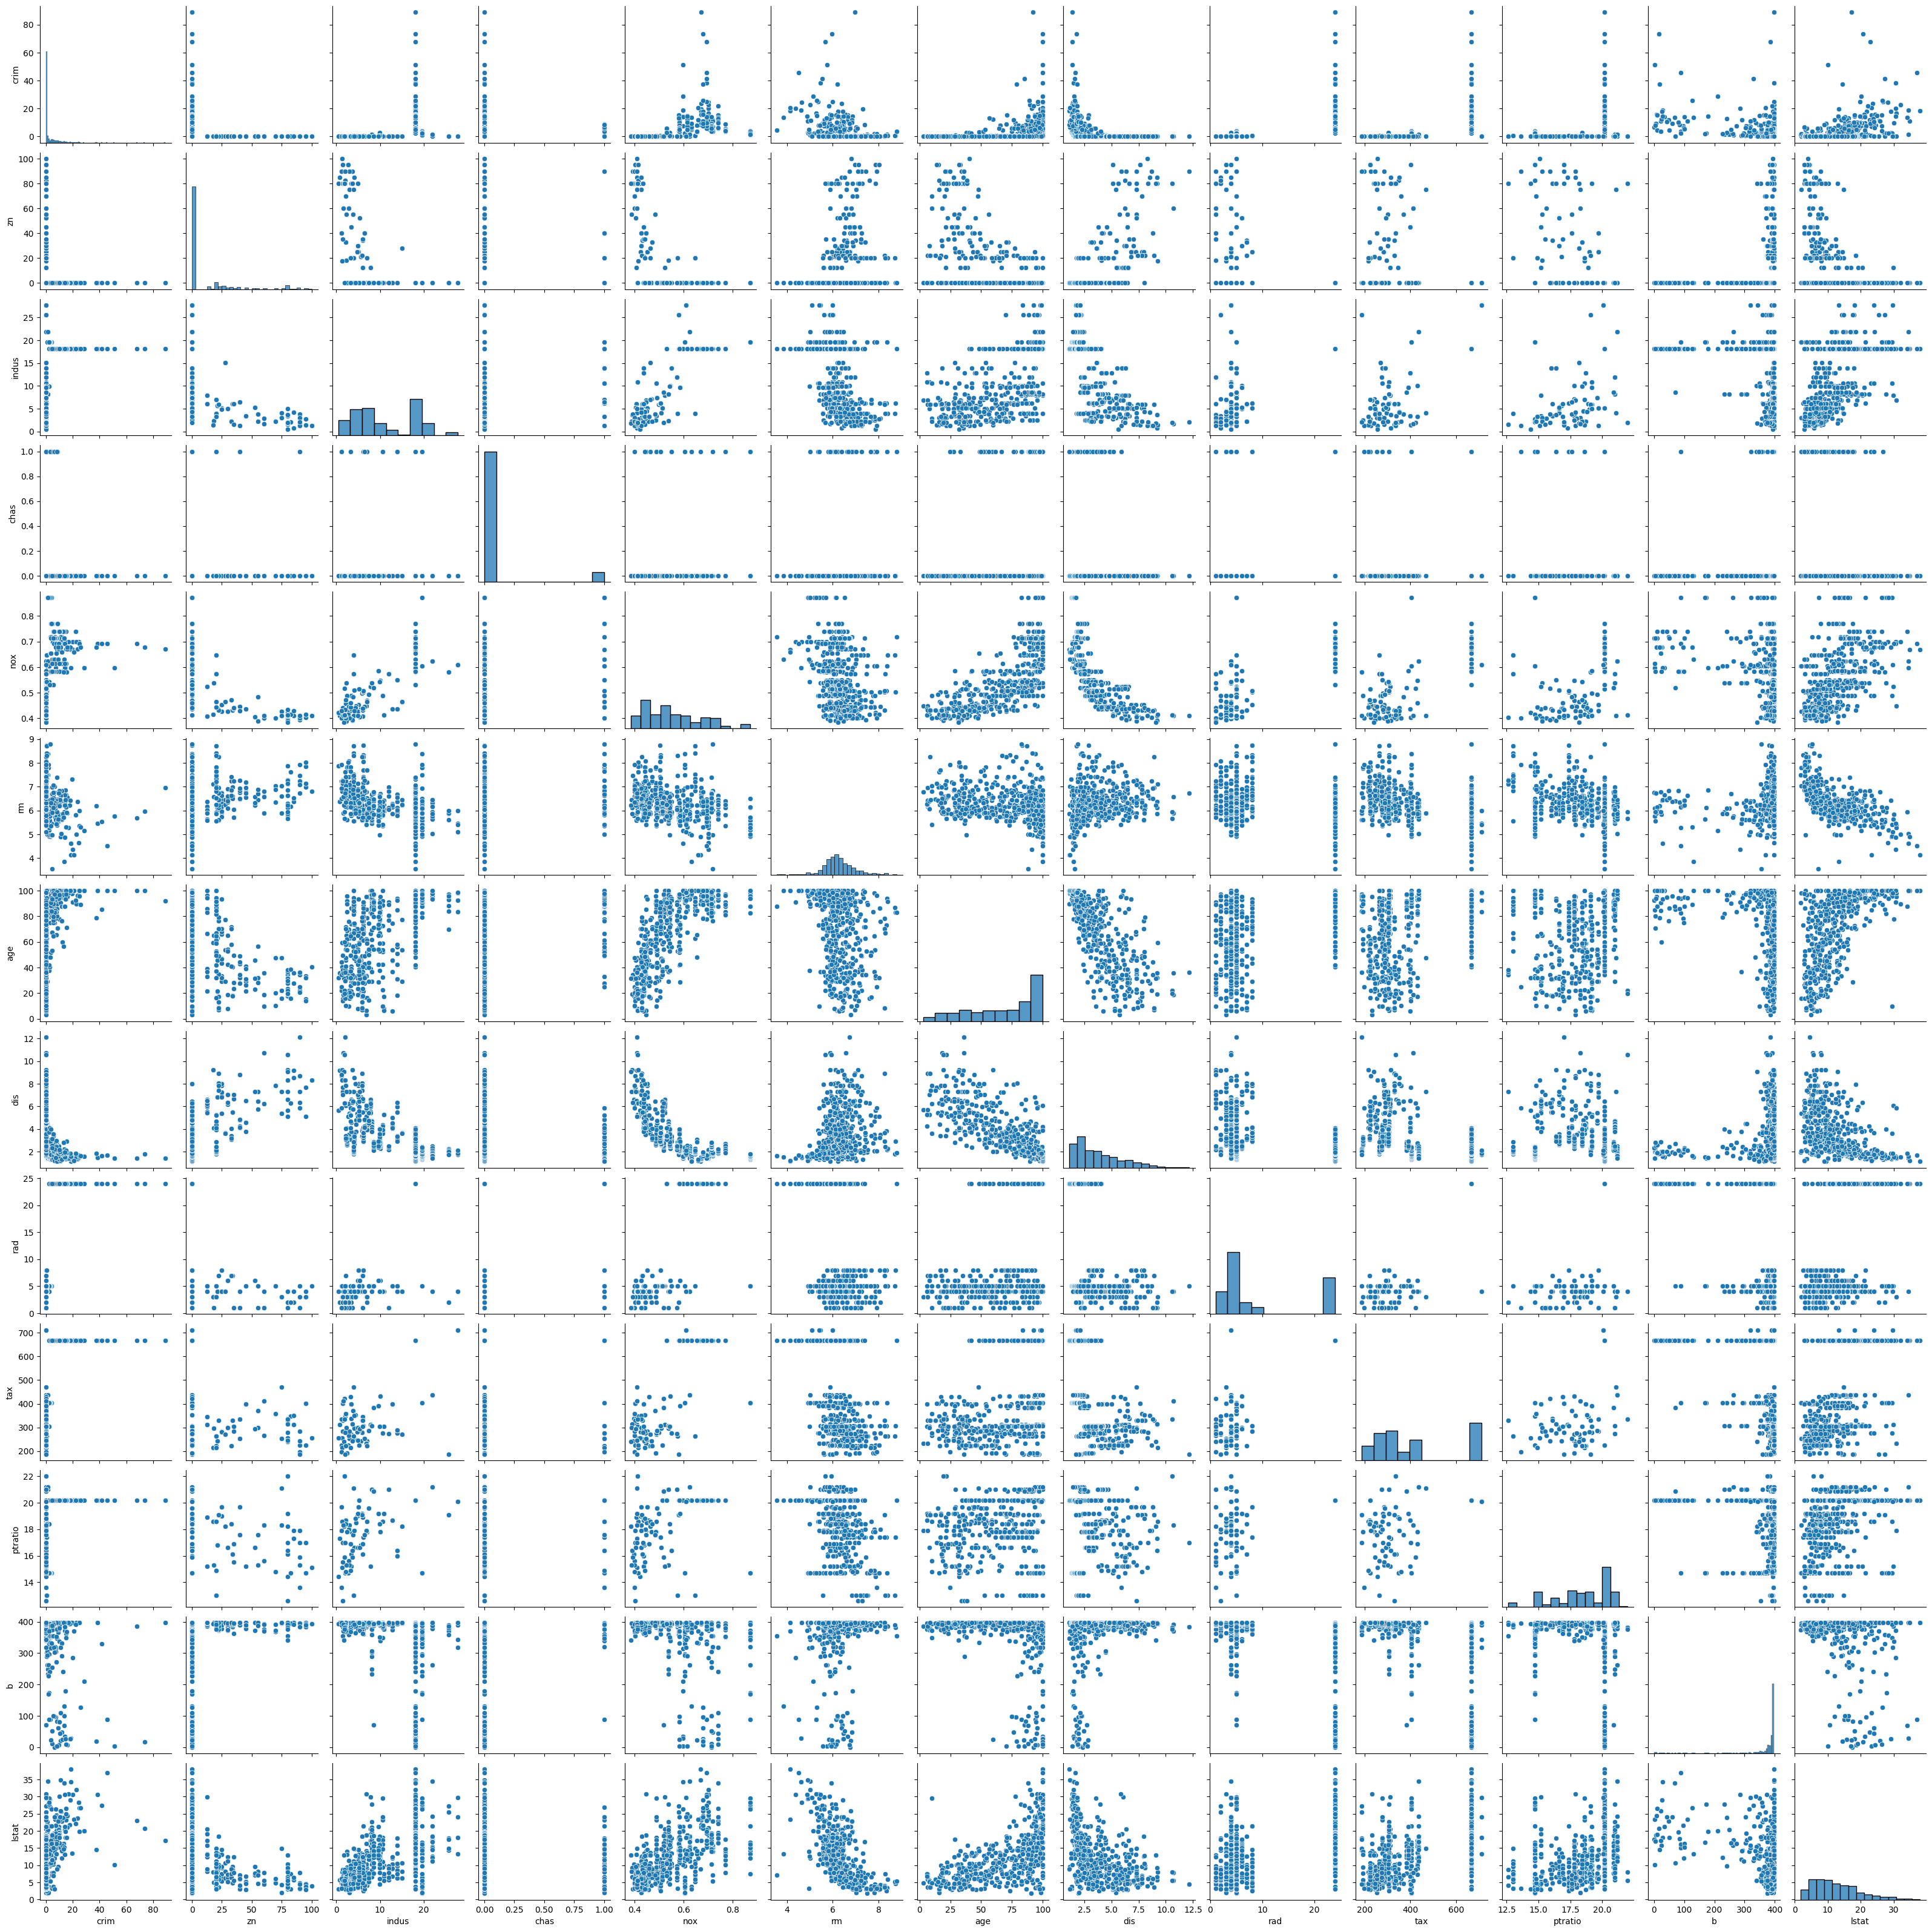

In [64]:
sns.pairplot(X_df)
plt.show()

Check the correlation between all pairs of features. Draw a heatmap containing these values. **(S1-8: 5 points)**

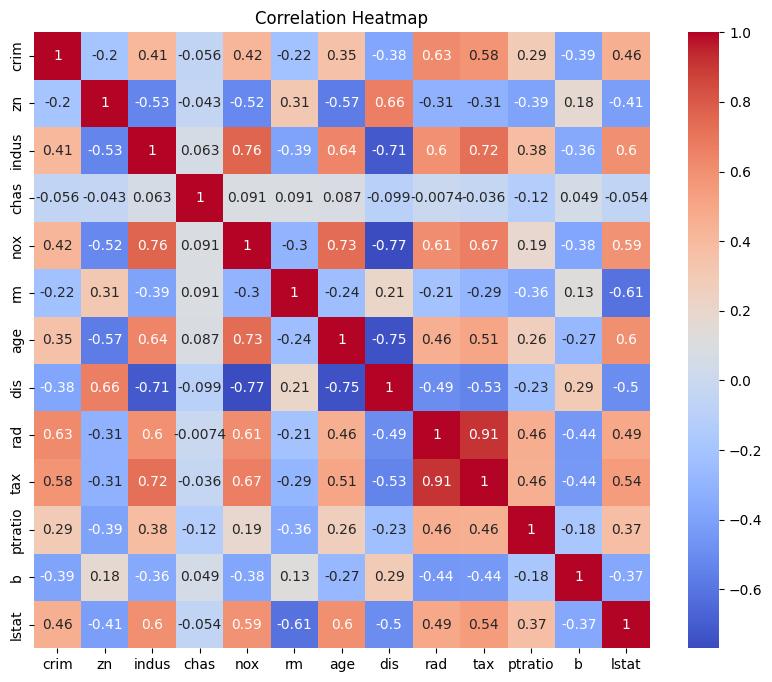

In [65]:
correlation_matrix = X_df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, ax=ax)
ax.set_title('Correlation Heatmap')
plt.show()

Based on the correlation matrix, reduce the number of features to 10. **(S1-9: 5 points)**

In [66]:
highest_correlated_each_row = pd.Series(dtype='float64')
for i in range(len(correlation_matrix.columns) - 1):
      highest_corr = max(abs(correlation_matrix.iloc[i+1, 0:(i+1)]))
      highest_correlated_each_row.loc[correlation_matrix.index[i+1]] = highest_corr
X_df_reduced = X_df.drop(highest_correlated_each_row.nlargest(3).index, axis = 1)
X_reduced = X_df_reduced.to_numpy()
X_reduced.shape

(506, 10)

# Sec 2: Data Manipulation and Feature Extraction (10)

Split the dataframe into training and evaluation sets (called `(x_train, y_train)` and `(x_eval, y_eval)`) **(S2-1: 2 points)**

In [67]:
x_train, x_eval, y_train, y_eval = train_test_split(X_reduced, Y, test_size=0.2, random_state=42)

Manipulate the training data to make it have unit variance and zero mean **(S2-2: 5 points)**

In [68]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

Normalize the evaluation set accordingly **(S2-3: 3 points)**

In [69]:
scaler = StandardScaler()
x_eval_scaled = scaler.fit_transform(x_eval)

# Sec 3: Fitting Models

In this part, we are going to use "pipelines" which are built inside `sklearn`. You are advised to familiarize yourself with them using the following link:
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

## A: Polynomial Regression (30)

Create 3 pipelines for polynomial regression of different arbitrary degrees. **(S3-1: 5 points)**

In [70]:
degrees = [1, 3, 10]
pl_1 = make_pipeline(PolynomialFeatures(degrees[0]), LinearRegression())
pl_2 = make_pipeline(PolynomialFeatures(degrees[1]), LinearRegression())
pl_3 = make_pipeline(PolynomialFeatures(degrees[2]), LinearRegression())

Calculate both the training and evaluation MSE error for each of the models. Finally, store these values in two lists, one containing the error values for the training set and the other one holding the same values for the evaluation set. **(S3-2: 10 points)**

In [71]:
pl_1.fit(x_train_scaled, y_train)
pl_2.fit(x_train_scaled, y_train)
pl_3.fit(x_train_scaled, y_train)
training_error = list()
evaluation_error = list()

training_error.extend(( mean_squared_error(y_train, pl_1.predict(x_train_scaled)),
                        mean_squared_error(y_train, pl_2.predict(x_train_scaled)), 
                        mean_squared_error(y_train, pl_3.predict(x_train_scaled)) 
                      ))
evaluation_error.extend(( mean_squared_error(y_eval, pl_1.predict(x_eval_scaled)),
                          mean_squared_error(y_eval, pl_2.predict(x_eval_scaled)), 
                          mean_squared_error(y_eval, pl_3.predict(x_eval_scaled)) 
                        ))
training_error, evaluation_error

([24.601766271481452, 2.046080160098246, 3.0492913239077955e-10],
 [31.34886959107781, 2.2288886568253425e+23, 469890644.0683675])

Plot the degree of the polynomials versus the corresponding MSE errors **(S3-3: 10 points)**

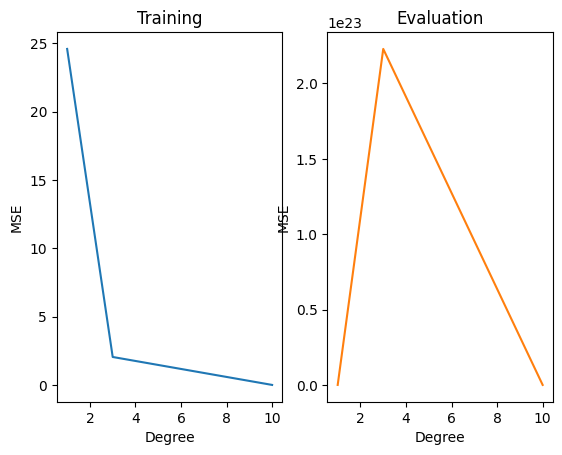

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set(xlabel='Degree', ylabel='MSE')
ax2.set(xlabel='Degree', ylabel='MSE')
ax1.set_title("Training")
ax2.set_title("Evaluation")
ax1.plot(degrees, training_error, 'tab:blue')
ax2.plot(degrees, evaluation_error, 'tab:orange')
# plt.xlabel("Degree")
# plt.ylabel("MSE")
# plt.title("MSE for different degrees for training and evaluation")
# plt.plot(degrees, training_error, color='blue', label = 'Training')
# plt.plot(degrees, evaluation_error, color='orange', label = 'Evaluation')
# plt.legend()
plt.show()

What is your conclusion? **(S3-4: 5 points)**

As we increase the degree of our polynomial, the model gets more complex and we get less bias; So its a fair thing that we see the MSE of training decrease.</br>
But for the evaluation, we expect a constant increase as the variance gets larger. But as we exceed the interpolation point at around degree 2, the evalation error gets lower and it can be seen in [double-descent](https://openai.com/research/deep-double-descent).

## B: Splines (30)

Create pipelines for spline regression based on all combinations of values for degree and the number of knots **(S3-5: 5 points)**

In [73]:
param_grid = {'spline_degree': [1, 3, 4],
              'spline_n_knots': [3, 4, 5]}
spline_pipelines = []
combinations = itertools.product(param_grid['spline_degree'], param_grid['spline_n_knots'])
for degree, n_knots in combinations:
  print(degree, n_knots)
  pipeline = make_pipeline(SplineTransformer(degree=degree, n_knots=n_knots),
                            LinearRegression())
  pipeline.fit(x_train_scaled, y_train)
  spline_pipelines.append(pipeline)

1 3
1 4
1 5
3 3
3 4
3 5
4 3
4 4
4 5


Calculate both the training and evaluation MSE error for each of models and 
store them in the corresponding pipelines. **(S3-6: 10 points)**

Note: A pipeline is a `dict` object. So, to store something in it, you have to consider a "key" and a "value".

In [74]:
training_mse_errors = []
evaluation_mse_errors = []
for pipeline in spline_pipelines:
  y_pred_training = pipeline.predict(x_train_scaled)
  training_mse_errors.append(mean_squared_error(y_train, y_pred_training))
  y_pred_evaluation = pipeline.predict(x_eval_scaled)
  evaluation_mse_errors.append(mean_squared_error(y_eval, y_pred_evaluation))

training_mse_errors, evaluation_mse_errors

([16.508772253983533,
  17.773132976871906,
  15.087747675808254,
  14.585271056524597,
  13.50300276085882,
  12.522646508547338,
  13.46853882876105,
  12.532784051423025,
  12.259814018022896],
 [3.3893453520086364e+16,
  2.1091387897417917e+26,
  20.50668369872926,
  2.2930073509042225e+20,
  30.889869586720188,
  29011.216087335324,
  3387.093817812656,
  692.161139792648,
  20960438.62170239])

Plot the joint distribution of training and eval error based on degree and knots **(S3-7: 10 points)**

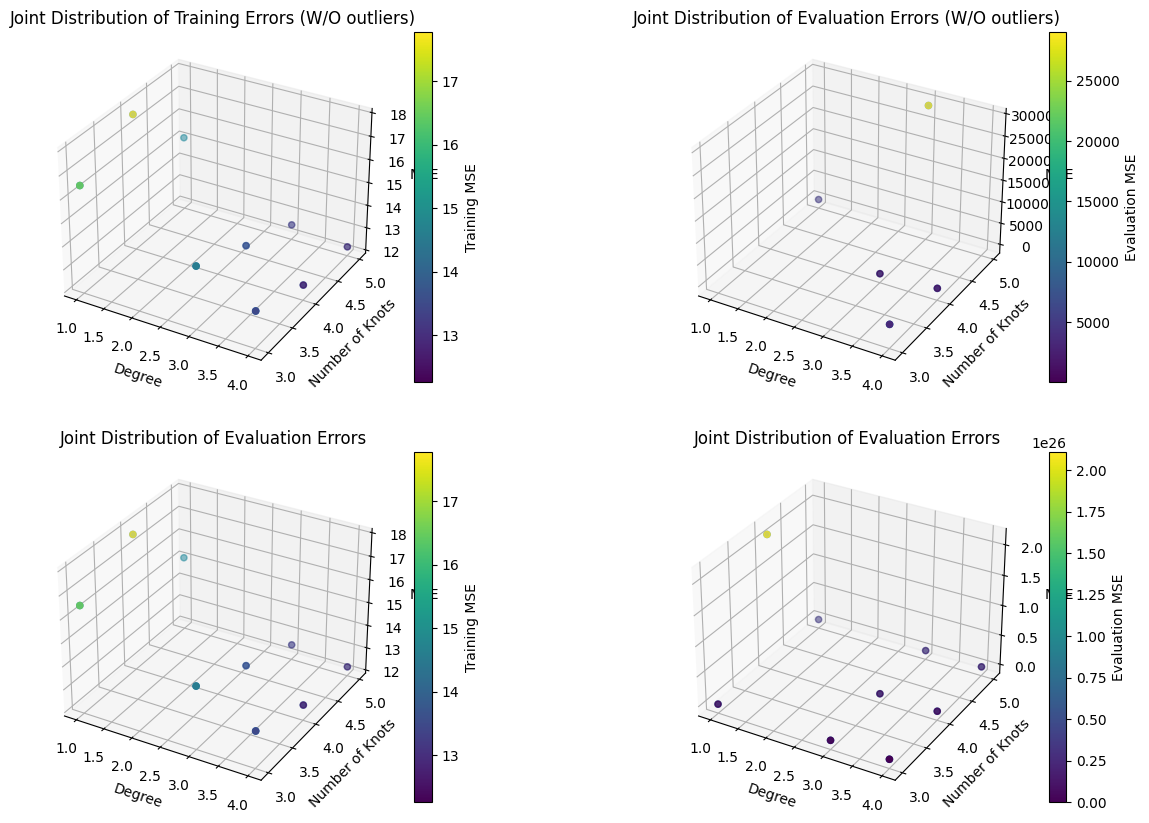

In [75]:
# Create lists of coordinates for the scatter plot
x_coords_ax_1 = []
y_coords_ax_1 = []
x_coords_ax_2 = []
y_coords_ax_2 = []
z_training = []
z_evaluation = []

x_coords_all = []
y_coords_all = []
z_training_all = []
z_evaluation_all = []

for degree, n_knots in itertools.product(param_grid['spline_degree'], param_grid['spline_n_knots']):
    t_mse = training_mse_errors.pop(0)
    e_mse = evaluation_mse_errors.pop(0)
    #Removing outliers
    if t_mse < 1e5:
      z_training.append(t_mse)
      x_coords_ax_1.append(degree)
      y_coords_ax_1.append(n_knots)
    
    if e_mse < 1e5:
      z_evaluation.append(e_mse)
      x_coords_ax_2.append(degree)
      y_coords_ax_2.append(n_knots)
    
    x_coords_all.append(degree)
    y_coords_all.append(n_knots)
    z_training_all.append(t_mse)
    z_evaluation_all.append(e_mse)

# Create a 3D scatter plot
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')

ax1.scatter(x_coords_ax_1, y_coords_ax_1, z_training, label='Training MSE (W/O outlier)')
ax2.scatter(x_coords_ax_2, y_coords_ax_2, z_evaluation, label='Evaluation MSE (W/O outliers)')
ax3.scatter(x_coords_all, y_coords_all, z_training_all, label='Training MSE')
ax4.scatter(x_coords_all, y_coords_all, z_evaluation_all, label='Evaluation MSE')

# Add colorbar
cbar1 = plt.colorbar(ax1.scatter(x_coords_ax_1, y_coords_ax_1, z_training, c=z_training, cmap='viridis'))
cbar2 = plt.colorbar(ax2.scatter(x_coords_ax_2, y_coords_ax_2, z_evaluation, c=z_evaluation, cmap='viridis'))
cbar3 = plt.colorbar(ax3.scatter(x_coords_all, y_coords_all, z_training_all, c=z_training_all, cmap='viridis'))
cbar4 = plt.colorbar(ax4.scatter(x_coords_all, y_coords_all, z_evaluation_all, c=z_evaluation_all, cmap='viridis'))
cbar1.set_label('Training MSE')
cbar2.set_label('Evaluation MSE')
cbar3.set_label('Training MSE')
cbar4.set_label('Evaluation MSE')

# Set plot labels and title
ax1.set_xlabel('Degree')
ax1.set_ylabel('Number of Knots')
ax1.set_zlabel('MSE')
ax1.set_title('Joint Distribution of Training Errors (W/O outliers)')

ax2.set_xlabel('Degree')
ax2.set_ylabel('Number of Knots')
ax2.set_zlabel('MSE')
ax2.set_title('Joint Distribution of Evaluation Errors (W/O outliers)')

ax3.set_xlabel('Degree')
ax3.set_ylabel('Number of Knots')
ax3.set_zlabel('MSE')
ax3.set_title('Joint Distribution of Evaluation Errors')

ax4.set_ylabel('Number of Knots')
ax4.set_xlabel('Degree')
ax4.set_zlabel('MSE')
ax4.set_title('Joint Distribution of Evaluation Errors')
# Show the plot
plt.show()
# y_coords, x_coords

What is your conclusion? **(S3-8: 5 points)**

**For Training**: </br>
As we increase the number of knots and the degree of out polynomial in each knot, the traning MSE gets lower and lower as we fit better to the training data. (We have more areas to get local pattern on and the model gets more complex on each of these knots.) </br>
**For Evaluation**: </br>
For the same number of knots, as we increase the degree, we know the model gets more complex, hence the variance gets larger. So we see that the evaluation error gets larger to some point. But as we see, from a point on, as we exceed the interpolation point, we get less evaluation error. This observation can be justified with [double-descent](https://openai.com/research/deep-double-descent).